In [20]:
import grafiti as gf
import scanpy as sc
import seaborn as sns
import torch
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

datadir = "/data1/shahs3/users/mezallj1/data/spectrum"
figdir = "/data1/shahs3/users/mezallj1/figures/spectrum"
sc.settings.figdir = figdir
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Grafiti

In [2]:
good_samples = [
    f'{datadir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_50_50_0.001_5_10_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_50_50_0.001_10_10_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_50_7_0.001_5_10_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_50_50_0.001_5_5_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_5_0.995.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_5_1.h5ad',
    f'{datadir}/grafiti/spectrum_grafiti_dcl_50_50_0.001_10_1_0.995.h5ad'
]

In [3]:
adata_grafiti = sc.read_h5ad(good_samples[0])

In [4]:
#gf.tl.find_motifs_gmm(adata_grafiti,k=10)

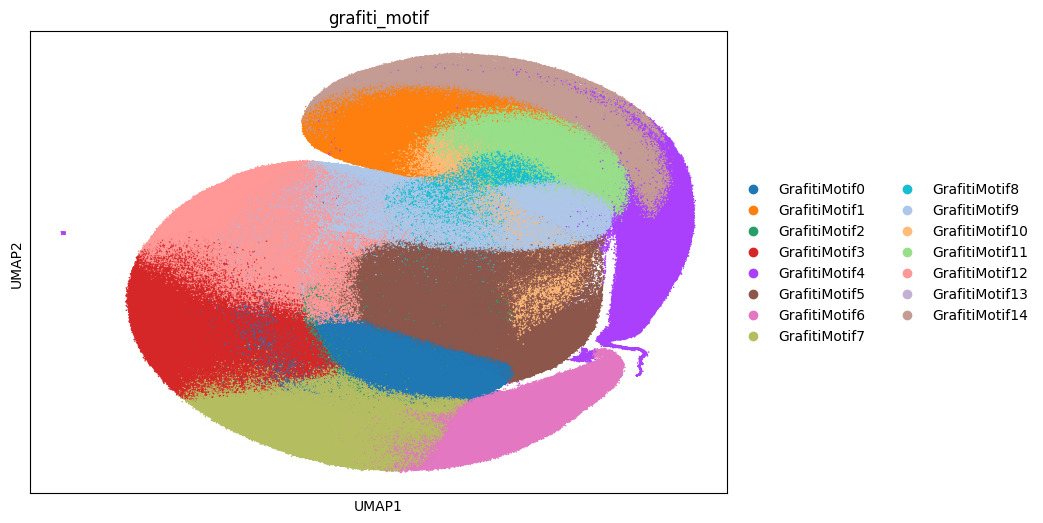

In [32]:
sc.pl.umap(adata_grafiti,color=["grafiti_motif"],ax=ax,s=5,show=False)
#plt.savefig(f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_umap.pdf', bbox_inches="tight")

In [15]:
xdata_grafiti = adata_grafiti.copy()
sc.pp.subsample(xdata_grafiti,fraction=0.05)
sc.tl.embedding_density(xdata_grafiti, basis='umap', groupby='consensus_signature')

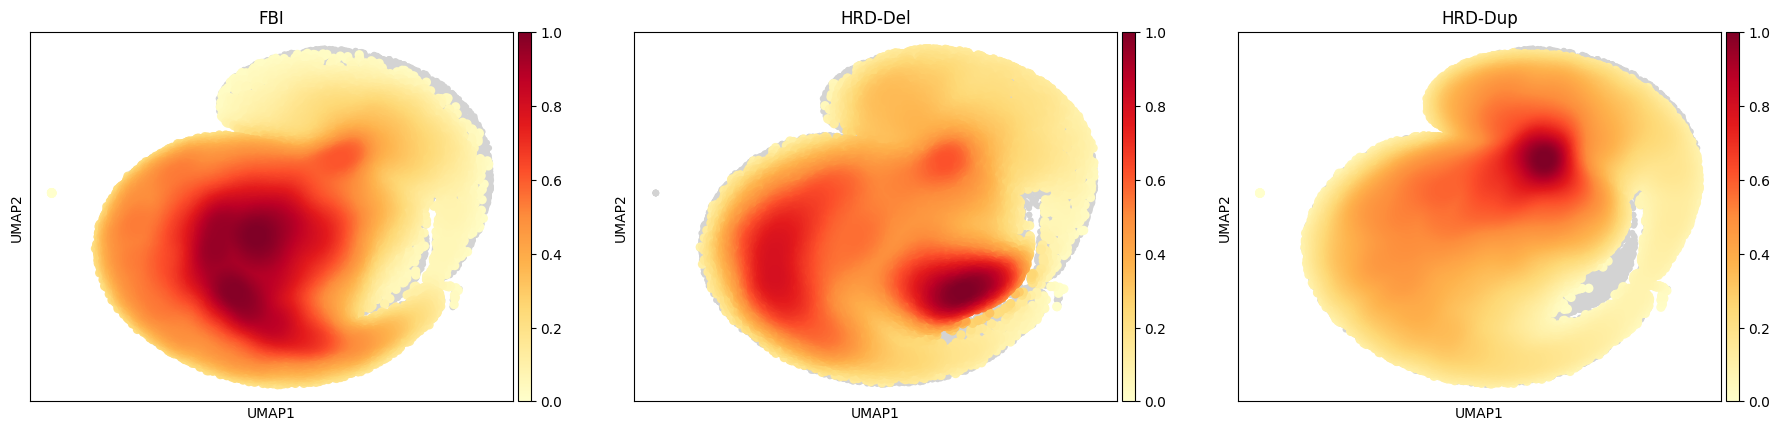

In [28]:
sc.pl.embedding_density(xdata_grafiti, basis='umap', key='umap_density_consensus_signature',show=False)
plt.savefig(f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_density.png', bbox_inches="tight")

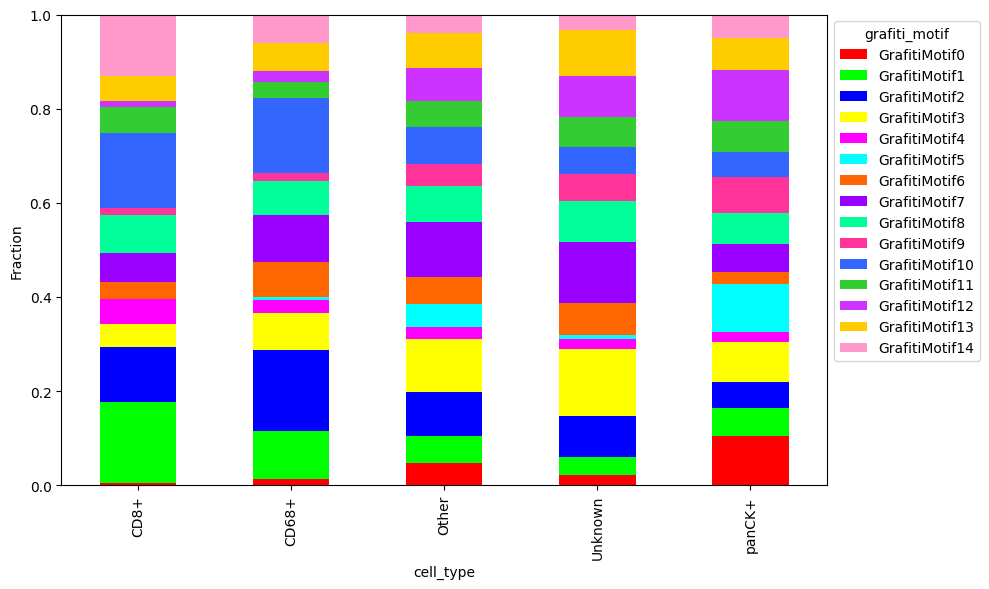

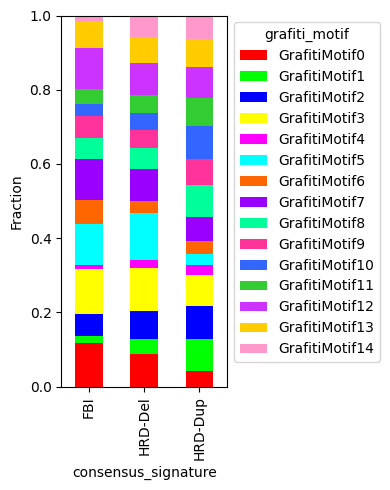

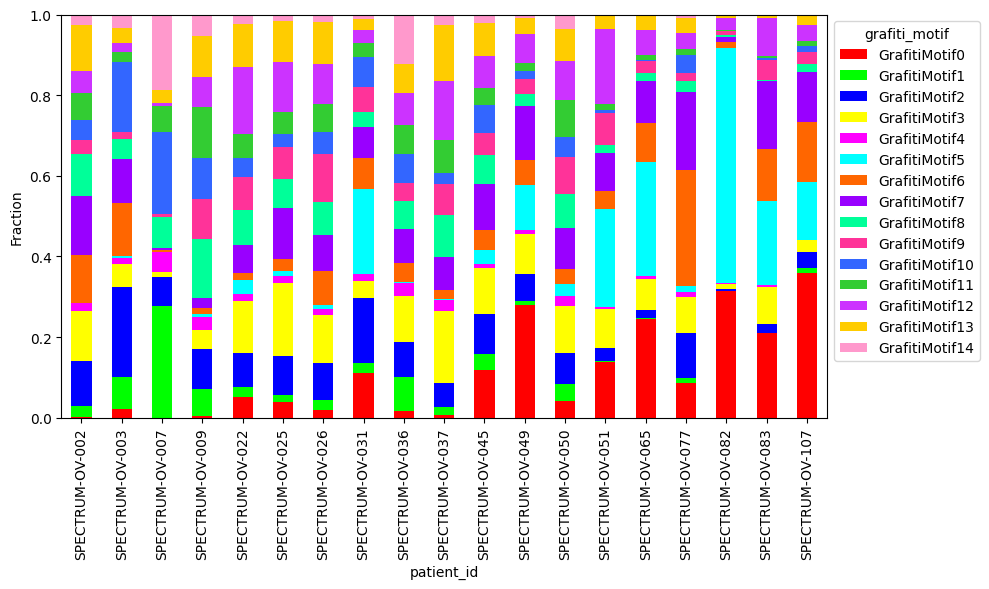

In [19]:
gf.pl.plot_fraction(adata_grafiti,category="cell_type",variable="grafiti_motif",save=f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_celltype.pdf')
gf.pl.plot_fraction(adata_grafiti,category="consensus_signature",variable="grafiti_motif",figsize=(4,5), save=f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_consensus.pdf')
gf.pl.plot_fraction(adata_grafiti,category="patient_id",variable="grafiti_motif", save=f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_patient.pdf')

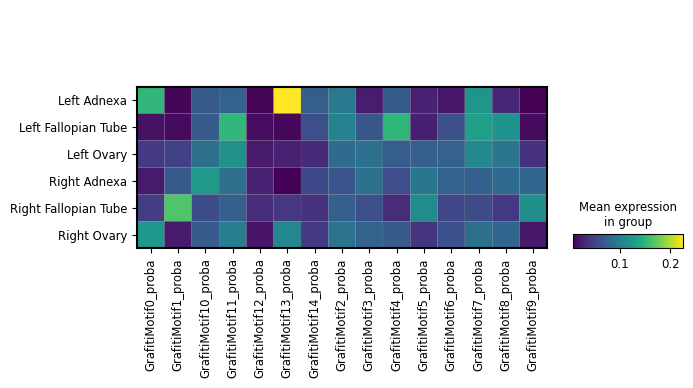

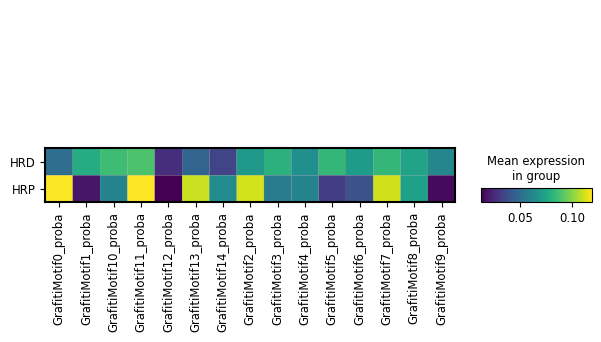

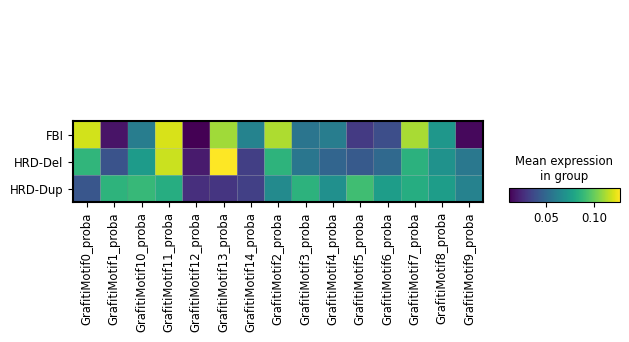

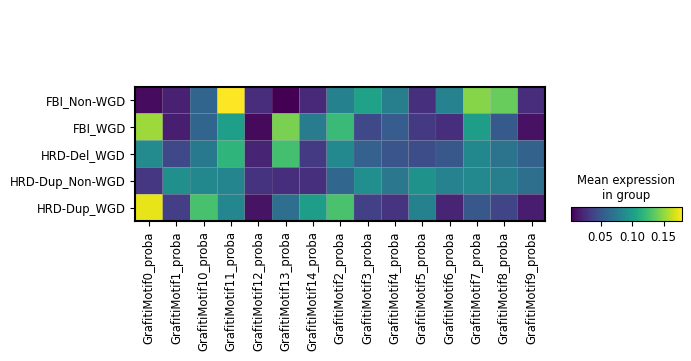

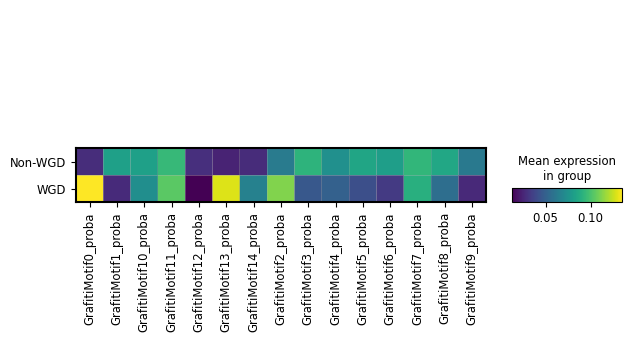

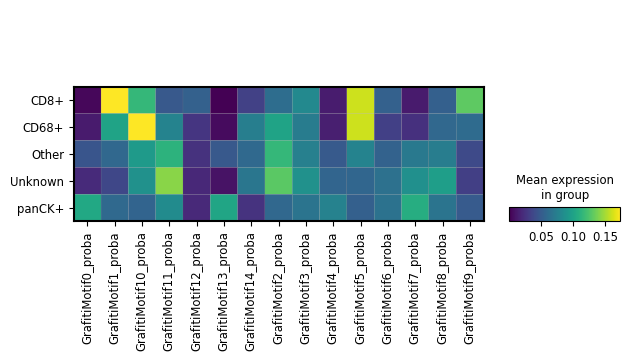

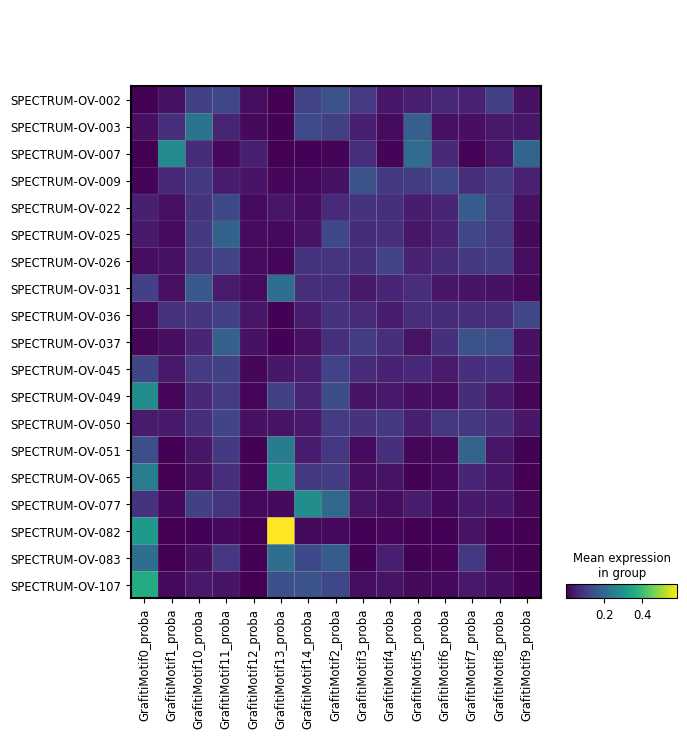

In [29]:
pcols = []
for x in adata_grafiti.obs.columns:
    if "proba" in x:
        pcols.append(x)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="tumor_subsite",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="consensus_signature_short",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="consensus_signature",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="status_plus",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="wgd_status",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="cell_type",show=False)
sc.pl.matrixplot(adata_grafiti,pcols,groupby="patient_id",show=False)
plt.savefig(f'{figdir}/grafiti/spectrum_grafiti_dcl_20_20_0.001_5_10_0.995_matrixplot.png', bbox_inches="tight")

In [ ]:
# Close the PdfPages object
grafiti_pdf.close()

# GraphST

In [33]:
adata_graphst = sc.read_h5ad(f'{datadir}/graphst/spectrum_graphst_bool.h5ad')

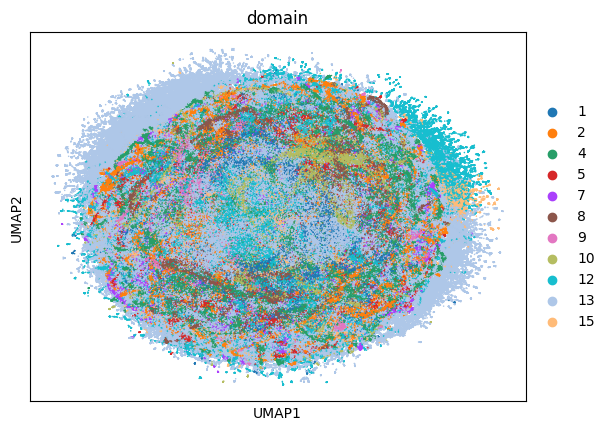

In [34]:
sc.pl.umap(adata_graphst,color=["domain"],s=5)

In [68]:
xdata_graphst = adata_graphst.copy()
sc.pp.subsample(xdata_graphst,fraction=0.05)
sc.tl.embedding_density(xdata_graphst, basis='umap', groupby='consensus_signature')

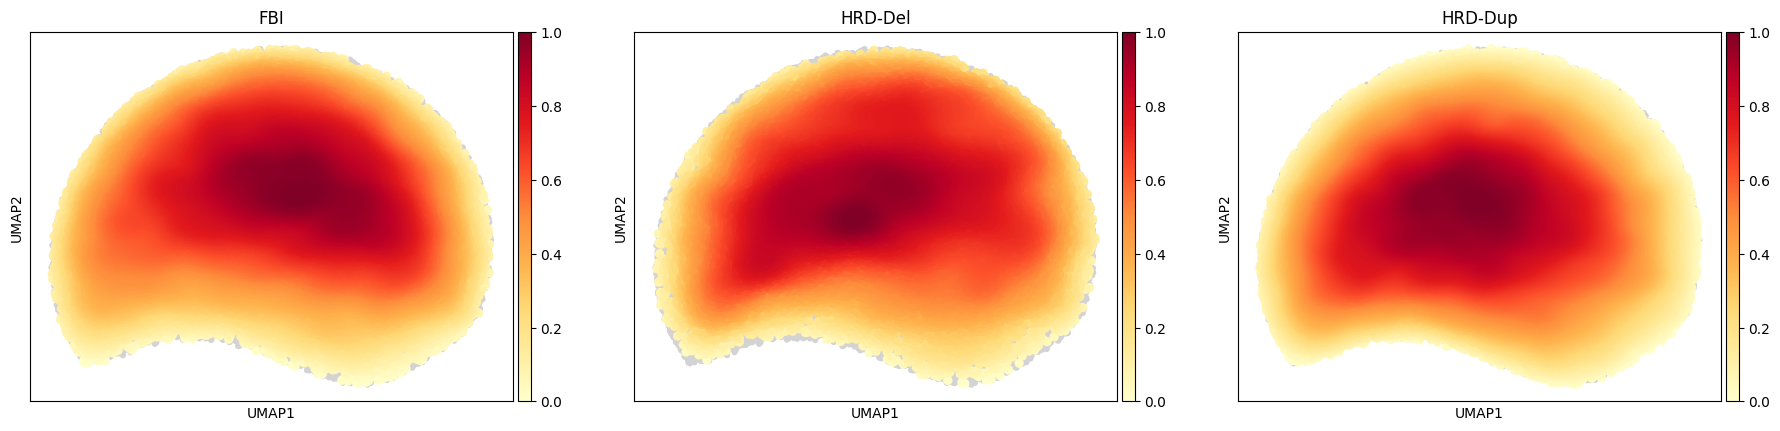

In [69]:
sc.pl.embedding_density(xdata_graphst, basis='umap', key='umap_density_consensus_signature')

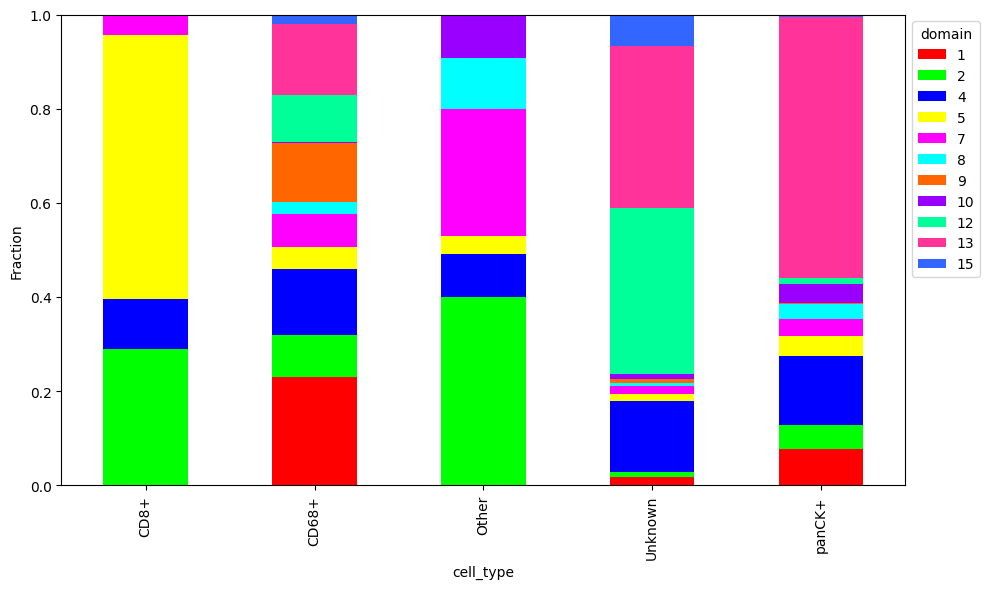

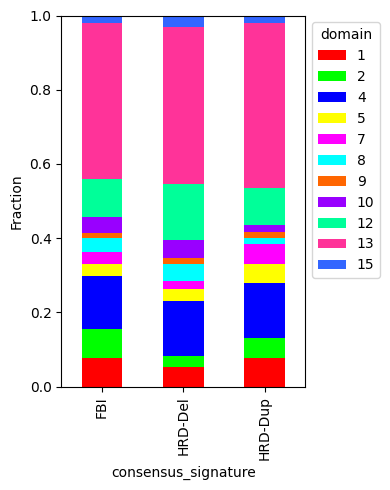

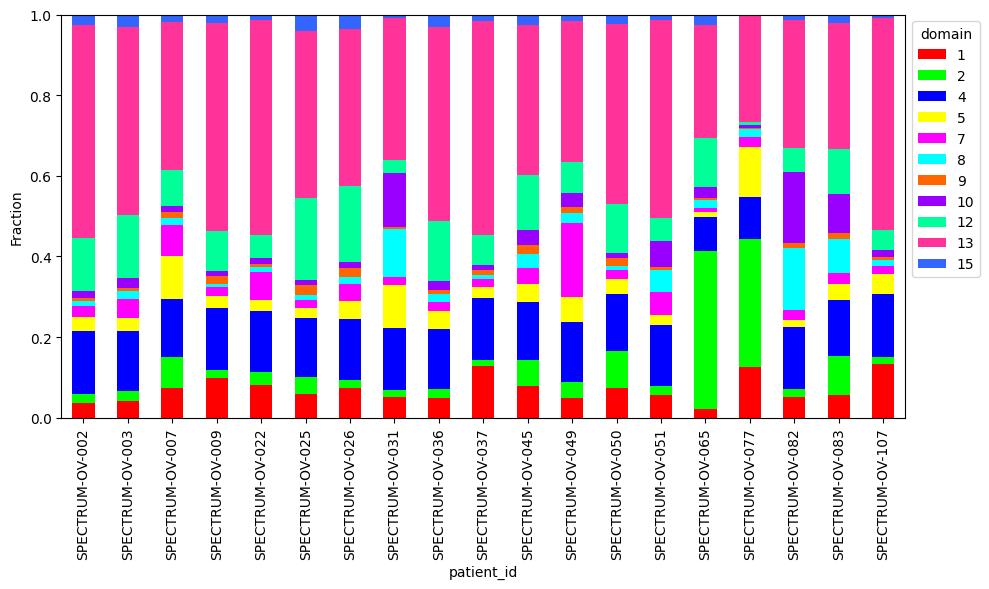

In [35]:
gf.pl.plot_fraction(adata_graphst,category="cell_type",variable="domain")
gf.pl.plot_fraction(adata_graphst,category="consensus_signature",variable="domain",figsize=(4,5))
gf.pl.plot_fraction(adata_graphst,category="patient_id",variable="domain")

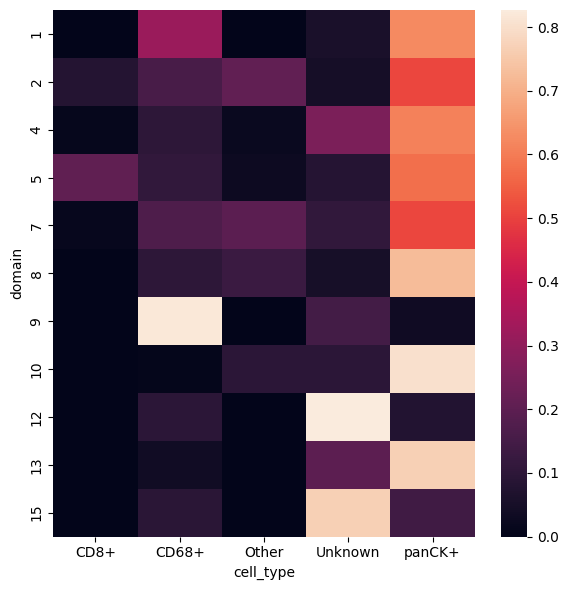

In [36]:
gf.pl.crosstab_heatmap(adata_graphst,'domain','cell_type')

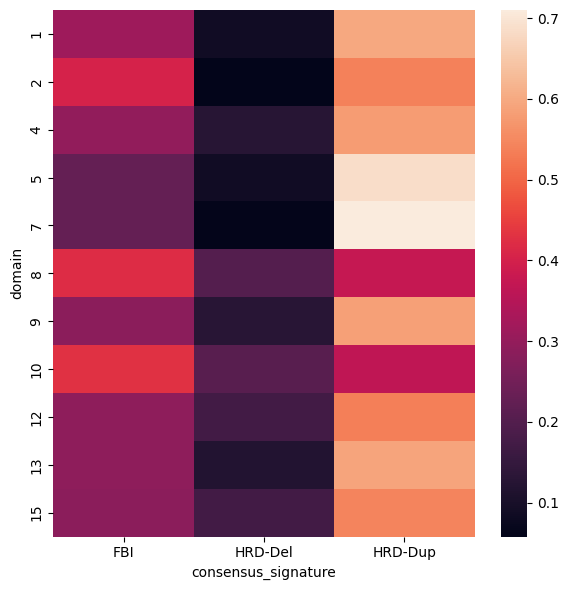

In [37]:
gf.pl.crosstab_heatmap(adata_graphst,'domain','consensus_signature')

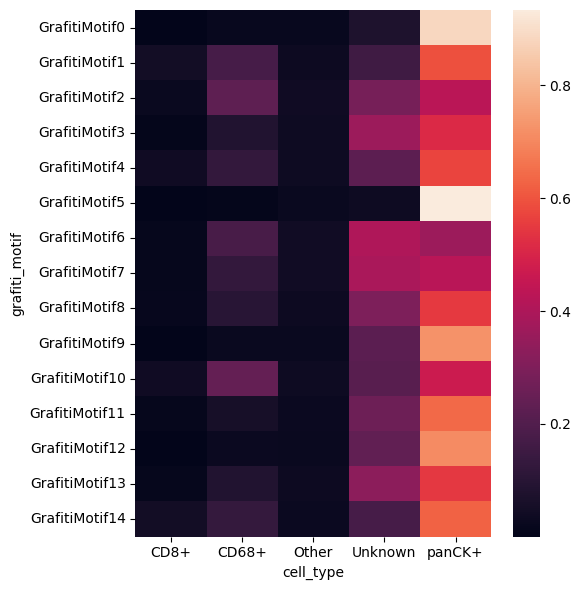

In [72]:
gf.pl.crosstab_heatmap(adata_grafiti,'grafiti_motif','cell_type')

In [73]:
pcols = ['domain']
for x in adata.obs.columns:
    if "proba" in x:
        pcols.append(x)
sc.pl.matrixplot(adata,'domain',groupby="tumor_subsite")
sc.pl.matrixplot(adata,pcols,groupby="consensus_signature_short")
sc.pl.matrixplot(adata,pcols,groupby="consensus_signature")
sc.pl.matrixplot(adata,pcols,groupby="status_plus")
sc.pl.matrixplot(adata,pcols,groupby="wgd_status")
sc.pl.matrixplot(adata,pcols,groupby="cell_type")

NameError: name 'adata' is not defined